In [71]:
!pip install sklearn_som

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn_som.som import SOM
from scipy import stats

In [73]:
index = 291951
plt.rcParams['figure.figsize'] = [15, 15]

In [74]:
dane = pd.read_csv('https://gist.githubusercontent.com/sikor272/3031999a870e7760824de89d663b011d/raw/ba3db6577e8d55a2d8133b96b6e24c64d11a6399/churn_pl_wybrane.csv', sep=',')

In [75]:
dane.columns

Index(['Czaswspolpracy', 'Liczbawiadomosci', 'Dzienminuty', 'Dzienrozmowy',
       'Wieczorminuty', 'Wieczorrozmowy', 'Nocminuty', 'Nocrozmowy',
       'Miedzynarodoweminuty', 'Miedzynarodowerozmowy', 'LiczbarozmowzBOK',
       'Planmiedzy01', 'Pocztagl01', 'Rezygnacja'],
      dtype='object')

In [76]:
columns = ['Czaswspolpracy', 'Liczbawiadomosci', 'Dzienminuty', 'Dzienrozmowy',
       'Wieczorminuty', 'Wieczorrozmowy', 'Nocminuty', 'Nocrozmowy',
       'Miedzynarodoweminuty', 'Miedzynarodowerozmowy', 'LiczbarozmowzBOK',
       'Planmiedzy01', 'Pocztagl01']

#Macierz Histogramów
Wymagane aby kolumny były numeryczne

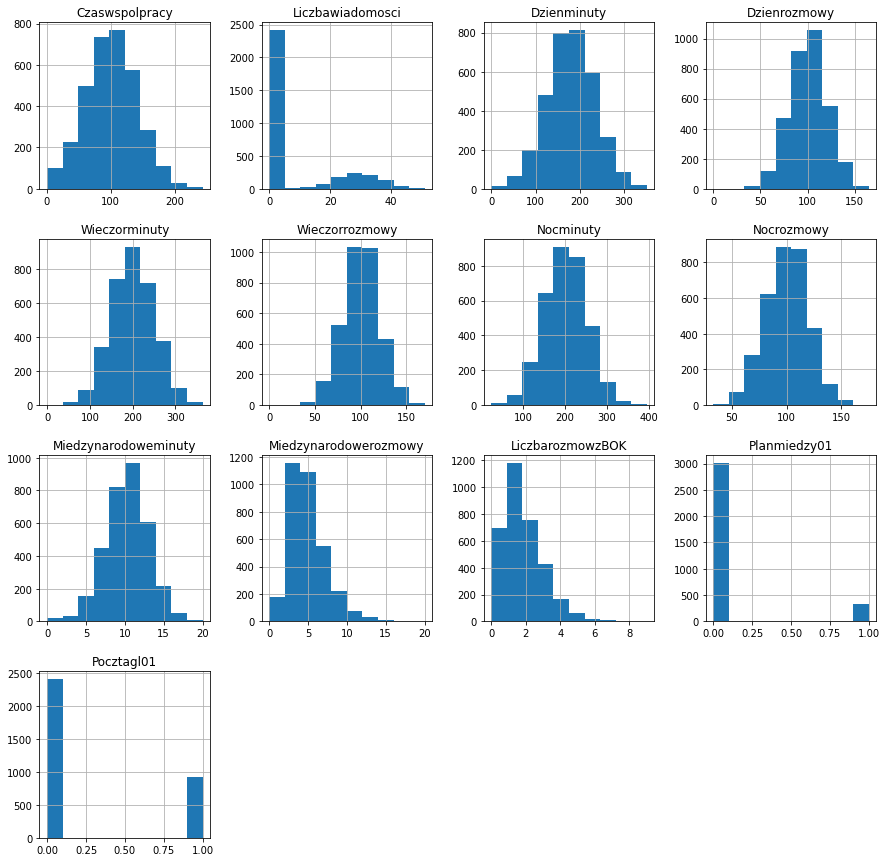

In [77]:
dane[columns].hist()
plt.show()

#Sieć kohonena

In [78]:
dane_som = dane[columns]
dane_som = stats.zscore(dane_som) # return np.array

In [79]:
som = SOM(m = 3, n = 3, dim = len(columns))
som.fit(dane_som)

In [80]:
som.cluster_centers_

array([[[-6.86076074e-02, -5.82649719e-01,  1.47379727e-01,
         -2.22703789e-01,  5.18214481e-02,  1.40956872e-01,
          4.01079099e-01,  2.84284161e-01,  3.16190810e-01,
          1.73099981e-02,  5.27418066e-02, -2.93894310e-01,
         -6.07815962e-01],
        [ 3.03927427e-02, -5.67523086e-01,  2.59564834e-01,
         -4.44510856e-02, -7.73713061e-02,  2.39624036e-01,
         -3.61778218e-01, -8.58812519e-02,  1.56695157e-01,
          5.18965460e-02, -1.81355334e-01, -3.15099424e-01,
         -5.85350945e-01],
        [ 3.17194724e-01, -5.29208389e-01,  4.16871358e-01,
          4.58395417e-01, -4.03199661e-01,  8.04618942e-02,
         -5.72616276e-01, -2.16151207e-01, -3.01861791e-01,
          1.44126670e-01, -2.24913993e-01, -3.25269544e-01,
         -5.27496734e-01]],

       [[ 1.35432421e-01, -4.03981858e-01, -1.08402745e-01,
         -4.13830366e-02,  1.71344815e-02, -8.51974073e-02,
          2.38355083e-01, -3.41051954e-02,  2.59117721e-01,
          1.98821

In [81]:
som.transform(dane_som) # Odległość Euklidesowa od obserwacji do każdego środka klastra

array([[3.59457778, 3.5754487 , 3.47416749, ..., 3.74611118, 2.58900451,
        2.35537911],
       [3.54456151, 3.72084348, 3.85613848, ..., 3.75508086, 2.53658678,
        2.23992547],
       [2.93895465, 2.44668527, 2.15818446, ..., 3.88266168, 3.61728607,
        4.16856593],
       ...,
       [3.73417736, 3.85278636, 4.21591075, ..., 4.43848846, 4.20884019,
        4.57447503],
       [5.7398649 , 5.58845306, 5.25646992, ..., 4.58813545, 5.45942899,
        6.41539534],
       [4.17613359, 4.19184524, 4.37397618, ..., 4.39466329, 3.34823559,
        2.93865686]])

In [82]:
dane['klaster'] = som.predict(dane_som)

In [83]:
dane.head(10)

,Czaswspolpracy,Liczbawiadomosci,Dzienminuty,Dzienrozmowy,Wieczorminuty,Wieczorrozmowy,Nocminuty,Nocrozmowy,Miedzynarodoweminuty,Miedzynarodowerozmowy,LiczbarozmowzBOK,Planmiedzy01,Pocztagl01,Rezygnacja,klaster
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,0,8
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,0,8
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0,2
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,0,6
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,0,6
5,118,0,223.4,98,220.6,101,203.9,118,6.3,6,0,1,0,0,6
6,121,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,1,0,7
7,147,0,157.0,79,103.1,94,211.8,96,7.1,6,0,1,0,0,6
8,117,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0,0,0,4
9,141,37,258.6,84,222.0,111,326.4,97,11.2,5,0,1,1,0,6


#Liczebność klastrów

In [84]:
dane.groupby('klaster').size().reset_index(name='ilość')

,klaster,ilość
0,0,695
1,1,453
2,2,501
3,3,318
4,4,213
5,5,33
6,6,317
7,7,100
8,8,703


#Średnie dla klastrów

In [85]:
dane.groupby('klaster')[columns + ['Rezygnacja']].mean().reset_index()

,klaster,Czaswspolpracy,Liczbawiadomosci,Dzienminuty,Dzienrozmowy,Wieczorminuty,Wieczorrozmowy,Nocminuty,Nocrozmowy,Miedzynarodoweminuty,Miedzynarodowerozmowy,LiczbarozmowzBOK,Planmiedzy01,Pocztagl01,Rezygnacja
0,0,90.535252,0.000000,182.032806,94.825899,205.923885,102.191367,238.961871,109.647482,10.811655,4.128058,1.294964,0.00,0.000000,0.152518
1,1,92.801325,0.000000,190.507947,94.715232,206.111038,108.587196,165.945475,96.503311,11.041722,4.019868,1.090508,0.00,0.000000,0.090508
2,2,118.175649,0.000000,196.761876,113.922156,175.642116,99.265469,176.540519,95.662675,8.475649,4.680639,1.267465,0.00,0.000000,0.111776
3,3,108.569182,0.000000,161.247170,99.487421,195.977987,94.308176,216.589623,96.022013,10.709748,4.867925,3.594340,0.00,0.000000,0.295597
4,4,98.323944,0.000000,129.043192,103.145540,231.121596,85.971831,189.017840,90.380282,9.825352,5.366197,1.375587,0.00,0.000000,0.023474
5,5,132.000000,19.242424,198.824242,114.484848,182.521212,103.757576,150.418182,91.545455,9.245455,5.575758,0.909091,0.00,1.000000,0.030303
6,6,104.782334,7.829653,188.389274,100.659306,203.171609,100.492114,197.232177,100.902208,10.621451,4.624606,1.485804,1.00,0.271293,0.425868
7,7,122.750000,25.710000,187.310000,100.950000,212.133000,102.530000,188.401000,106.440000,11.143000,4.950000,3.160000,0.06,1.000000,0.160000
8,8,95.827881,30.307255,176.423044,98.830725,202.266856,99.432432,205.327312,100.105263,10.062162,4.351351,1.318634,0.00,1.000000,0.041252
